# Decision Tree Project 1: the `iris` dataset

We are going to use the Decision Tree model to study the `iris` dataset. This dataset has already studied previously using k-NN. Again we will only use the first two features for visualization purpose.

Since the dataset will be splitted, we will put `X` and `y` together as a single variable `S`. In this case when we split the dataset by selecting rows, the features and the labels are still paired correctly. 

We also print the labels and the feature names for our convenience.

In [19]:
from sklearn.datasets import load_iris
import numpy as np
from assests.codes.dt import gini, split, countlabels

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target
y = y.reshape((y.shape[0],1))
S = np.concatenate([X,y], axis=1)

print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Then we apply `split` to the dataset `S`. 

In [20]:
r = split(S)
if r['split'] is True:
    Gl, Gr = r['sets']
    print(r['pair'])
    print('The left subset\'s Gini impurity is {g:.2f},'.format(g=gini(Gl)),
          ' and its label counts is {d:}'.format(d=countlabels(Gl)))
    print('The right subset\'s Gini impurity is {g:.2f},'.format(g=gini(Gr)),
          ' and its label counts is {d}'.format(d=countlabels(Gr)))

(0, 1.9)
The left subset's Gini impurity is 0.00,  and its label counts is {0.0: 50}
The right subset's Gini impurity is 0.50,  and its label counts is {1.0: 50, 2.0: 50}


The results shows that `S` is splitted into two subsets based on the `0`-th feature and the split value is `1.9`. 

The left subset is already pure since its Gini impurity is `0`. All elements in the left subset is label `0` (which is `setosa`). The right one is mixed since its Gini impurity is `0.5`. Therefore we need to apply `split` again to the right subset.

In [21]:
r = split(Gr)
if r['split'] is True:
    Grl, Grr = r['sets']
    print(r['pair'])
    print('The left subset\'s Gini impurity is {g:.2f},'.format(g=gini(Grl)),
          ' and its label counts is {d:}'.format(d=countlabels(Grl)))
    print('The right subset\'s Gini impurity is {g:.2f},'.format(g=gini(Grr)),
          ' and its label counts is {d}'.format(d=countlabels(Grr)))

(1, 1.7)
The left subset's Gini impurity is 0.17,  and its label counts is {1.0: 49, 2.0: 5}
The right subset's Gini impurity is 0.04,  and its label counts is {1.0: 1, 2.0: 45}


This time the subset is splitted into two more subsets based on the `1`-st feature and the split value is `1.7`. The total Gini impurity is minimized using this split. 

The decision we created so far can be described as follows:

1. Check the first feature `sepal length (cm)` to see whether it is smaller or equal to `1.9`.
   1. If it is, classify it as lable `0` which is `setosa`.
   2. If not, continue to the next stage.
2. Check the second feature `sepal width (cm)` to see whether it is smaller or equal to `1.7`. 
   1. If it is, classify it as label `1` which is `versicolor`.
   2. If not, classify it as label `2` which is `virginica`.

Now we would like to use the decision tree package provided by `sklearn`. The process is straightforward.

In [22]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

`sklearn` provide a way to automatically generate the tree view of the decision tree. The code is as follows. 

[Text(0.375, 0.875, 'sepal width (cm) <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.5, 0.625, 'sepal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.25, 0.375, 'sepal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.125, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.375, 'sepal length (cm) <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica'),
 Text(0.625, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.125, '\n  (...)  \n')]

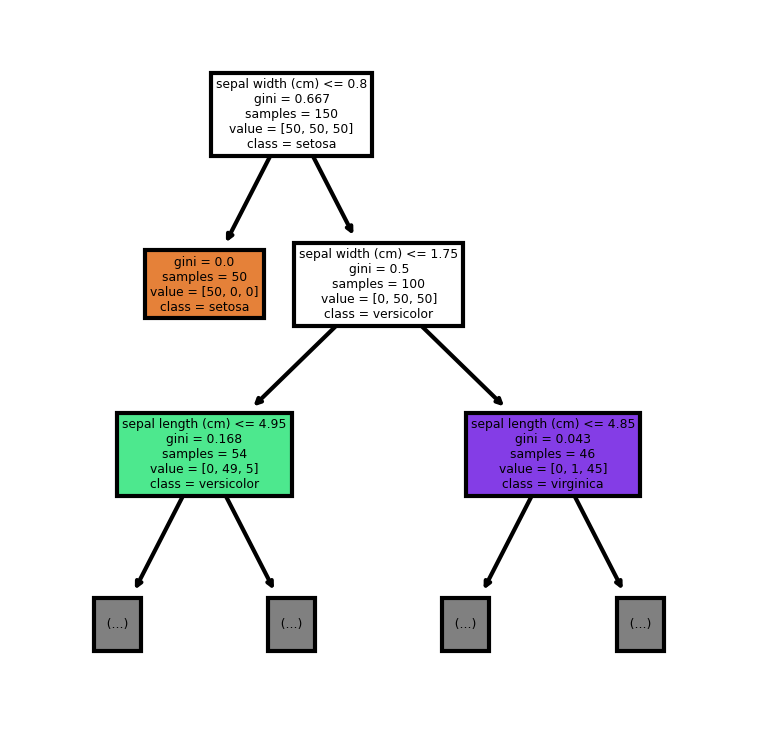

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3, 3), dpi=300)
tree.plot_tree(clf, max_depth=2, feature_names=iris.feature_names, class_names=iris.target_names,
               filled=True, impurity=True)

Similar to k-NN, we may use `sklearn.inspection.DecisionBoundaryDisplay` to visualize the decision boundary of this decision tree.

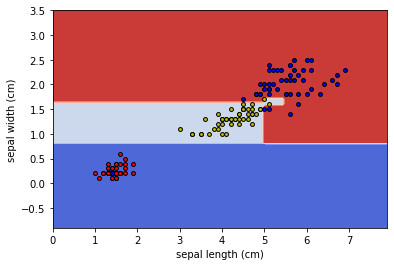

In [27]:
from sklearn.inspection import DecisionBoundaryDisplay
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap='coolwarm',
    response_method="predict",
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
)

# Plot the training points
for i, color in zip(range(3), 'ryb'):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=color,
        label=iris.target_names[i],
        cmap='ryb',
        edgecolor="black",
        s=15,
        )